
## 4.1 Introduction:

 
Machine learning has excelled in computer vision and natural language tasks, especially the deep neural networks, but our understanding on how the prediction is reached at by these complex models is minimal and more often they are criticised for their inability to explain why they have arrived at a particular decision.<br>

In some applications, simple models (e.g., linear models) are often preferred for their ease of interpretation, even if they may be less accurate than complex ones. However, the growing availability of big data has increased the benefits of using complex models, so bringing to the forefront the trade-off between accuracy and interpretability of a model’s output.<br>


In this module  we look at methods, that can help us relate the influence of input on the ouput. More specifically we look at methods that distributes the final classification score to each pixel in the input quantifying its impact in making that decision. 

This score then can be used by a human observer to validate the classification result and also to find out potential regions of interest.

## 4.2.1 Additive feature attribution:

 LIME belongs to a class of models called as additive feature attribution models in which models assign an effect $\phi_i$ to each feature termed as feature attribution, and summing the effects of all feature attributions approximates the output  of the original model. <br>
 
 Additive feature attribution methods have an explanation model $g$(simple model) that is a linear function of binary variables:<br><br>
\begin{align}
g(z') = {\phi}_0 + \sum_{i=1}^{M} \phi_i z'_i\end{align}, <br>

where $z' ∈ \{{0, 1}\}^M$, $M$ is the number of simplified input features, <br>
                  and $\phi_i ∈ \mathbb{R}$ are the parameters of simpler model.<br>
Here $z'$ are the samples from $x'$ - the input.


## 4.2.2 Local Intepretable Model Agnostic Explanation (LIME):<br>

The best explanation of a **simple** model is the model itself - such as a linear model with only a few non-zero coefficients which is easily interpretable by humans.

\begin{align}
f(x) = w_i * x_i
\end{align}


In the linear model above ,the coefficients($w_i$) conveys us the importance of each feature($x_i$) to the final prediction. This could help us reason about the model prediction such as identifying features that are crucial in arriving at final prediction.<br>

But a deep learning model contains multiple layers and the features at the final layer are not-intepretable. We are aware that this chain of non-linearity is essential to get good predictions but they also increase the model complexity and make it non-intepretable.


LIME is a method proposed by [1], which treats the complex model as a black box and hence it can be used with any model.In LIME  to understand a  prediction  from original complex model on a given data sample, we seek a simpler explanation model, which we define as any interpretable approximation of the original model around the sample of interest.<br>

Let $f$ be the original prediction model to be explained and $g$ the explanation model. 




## 4.2.3 The LIME method: <br>

Here, we focus on methods designed to explain a prediction $f(x)$ based on a single input $x$. The explanation model $g$ is fit on a set of samples $x'$ that are  simplified transformation of $x$ that are very close to $x$. <br><br>

<img src="lime_1.png" style="width: 350px;" /> 

In the above image the pink colored boundary is the non-linear decision boundary given by a complex model. In an attempt to provide an explanation for its prediction around a data point represented by the thicker plus symbol, we sample many datapoints around it and fit a linear model. Though the original model is non-linear and complex,in LIME we approximate it only around the chosen datapoint(hence local) and get a linear model (hence intepretable)

**Algorithm**:
1. Sample points around the input $x_i$
2. Use complex model to predict labels for each sample
3. Weigh samples according to distance to $x_i$
4. Learn new simple model on weighted samples
5. Use simple model to explain




<img src="lime_2.png" style="width: 450px;" /> 


Image Credit: LIME Paper [1]

###  4.2.4 Intepretable Transformation:


Explanation models use simplified inputs that are intepretable  $x'$ that map to the original inputs through a mapping function $x = h_x(x')$. 

For image classification, an interpretable representation may binary vector indicating the “presence” or “absence” of a contiguous patch of similar pixels (a super-pixel). 




We take the input image and divide it into interpretable components (contiguous superpixels).<br>
For this, lime uses Quickshift image segmentation (more info [here](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_segmentations.html#sphx-glr-auto-examples-segmentation-plot-segmentations-py))
<img src="lime_3-1.png" style="width: 250px;" />
<img src="lime_3-2.png" style="width: 250px;" />

We now sample instances around our input and pass it through the complex model as shown in the image below.<br>
<img src="lime_4.png" style="width: 650px;" />

On the left we have the original data point.In the middle we have some samples of x' that are closer to x. These samples are obtained by turning off certain superpixels. Each of these samples are passed on our complex classifier and its predictions are obtained. Later a simplified linear model is fit on $z$ that is a binary representation of the $x_i$ where $z_i$ is 1 if the superpixel is kept on or 0 otherwise.

\begin{align}
g(z') = {\phi}_0 + \sum_{i=1}^{M} \phi_i z'_i\end{align}


Since the coefficients in a  linear model directly specifiy how important the feature is, by looking that the feature with higher coefficient($\phi_i$),we get to identify the superpixels that have contributed for the prediction. Thus we arrive at an explanation for the prediction made by the complex model.

## 4.2.5 Model selection

And coming to $g$ - our explanation model has be simple enough to be interpretable - thus we let $\Omega(g)$ be a measure of complexity (as opposed to interpretability) of the explanation $g$. For example, for decision trees $\Omega(g)$ may be the depth of the tree, while for linear models, Ω(g) may be the number of non-zero weights.

In order to weight samples based on distance we have $\pi_x(z)$ - a proximity measure between an instance z to x, so as to define locality around x.

Let $L(f,g,\pi_x)$ be a measure of how unfaithful $g$ is in approximating $f$ in the locality defined by $\pi_x$. In order to ensure both interpretability and local fidelity, we must minimize $L(f, g, \pi_x)$ while having $\Omega(g)$ be low enough to be interpretable by humans. The explanation produced by LIME is obtained by the following:<br>


\begin{align}
\xi(x) = {arg \; min}_{g\in{G}}\; L(f,g,\pi_{x}) + \Omega(g)
\end{align} <br><br>
where,L represents the closeness of datasamples and $\Omega$ represents the complexity of model. LIME thus picks a model that is simple as well as closer to the given data sample.


In [1]:
## Reference


## Import required modules


import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
from lime import lime_image
%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)

Using TensorFlow backend.


Notebook run using keras: 2.2.4


In [2]:
## Load the inception model

inet_model = inc_net.InceptionV3()

W1110 16:44:10.311524 139640611338048 deprecation_wrapper.py:119] From /home/peerless/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1110 16:44:10.331802 139640611338048 deprecation_wrapper.py:119] From /home/peerless/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1110 16:44:10.335363 139640611338048 deprecation_wrapper.py:119] From /home/peerless/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1110 16:44:10.350207 139640611338048 deprecation_wrapper.py:119] From /home/peerless/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_de

In [3]:
## helper function to load the image and transform it as required by inception model.

## We also preprocess the image as stipulated by the model by calling its preprocess_input function

def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        ## Inception model requires image of size (299,299)
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0) ##modify it as if the batch size is 1
        x = inc_net.preprocess_input(x) ## call inception model specific preprocessing.
        out.append(x)
    return np.vstack(out)

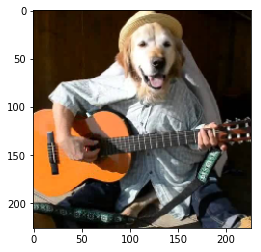

In [4]:
## Loads the image
im_display = imread('../images/monkey_guitar.png')
plt.imshow(im_display)

In [5]:
## Load the model and run in through the inception network and get prediction.

images = transform_img_fn(['../images/monkey_guitar.png'])
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

('n02676566', 'acoustic_guitar', 0.8161679)
('n03272010', 'electric_guitar', 0.018204907)
('n03929660', 'pick', 0.011539316)
('n02099601', 'golden_retriever', 0.009939371)
('n02787622', 'banjo', 0.009532359)


The function decode_predictions decodes the results into a list of tuples (class, description, probability). We could see the the top prediction was for acoustic guitar. We also have a prediction for golden retriever. Since both a dog and guitar is present in the image, if we could identify the pixels that contributed more for these predictions, then we could have more confidence on our classifier.

In [6]:


#Let us create a LIME explainer

explainer = lime_image.LimeImageExplainer()

# This implementation of LIME lets us specify the value for superpixels that are turned off through hide_color parameter.
# We are setting hide_color to zero, Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
# image is the data point whose explanation we seek
# inet_model.predict is the prediction obtained from inception network
# top_labels specifies the k such that the top-k prediction explanations will be generated.
# num_samples: size of the neighbhourhood to learn the model.
explanation = explainer.explain_instance(images[0], inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)

In [7]:
## Now having set up the LIME explainer let's look at the top prediction.

decode_predictions(preds)[0][0]

('n02676566', 'acoustic_guitar', 0.8161679)

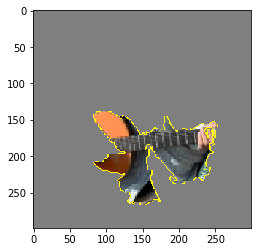

In [8]:
# label: prediction to explain
# num_features: number of superpixels to include in explanation
# positive_only: if True, only take superpixels that contribute to he prediction of the label. 
#                Otherwise, use the top num_features superpixels, which can have  positive or negative influence
#  hide_rest: if True, make the non-explanation part of the return image gray
           
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

The top prediction was for acoustic guitar and our LIME model has marked the superpixels that have contributed towards that prediction. We could see the guitar region being picked and it explains the choice of prediction quite well.

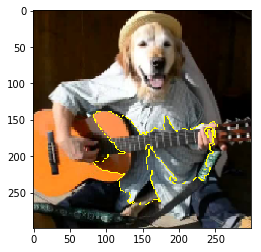

In [9]:
## set hide_rest to false and compare it with the overall image

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

The model has reasonably picked up regions that are common with an acoustic guitar and avoided other regions.

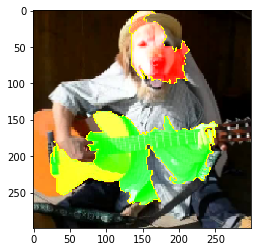

In [10]:

## Set positive_only to False 
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

The model has associated dog's face as against the presence of guitar and hence we have a red patch around that superpixel.

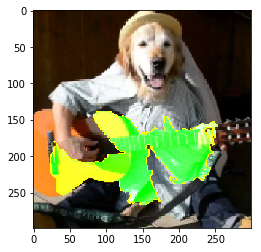

In [11]:
## min_weight : Picks all the superpixel whose attribution exceeds this parameter.
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

We could see all the superpixels with weight above the specified min_weight marked in our output image.

In [12]:
## let us look at the next predicted label
decode_predictions(preds)[0][1]

('n03272010', 'electric_guitar', 0.018204907)

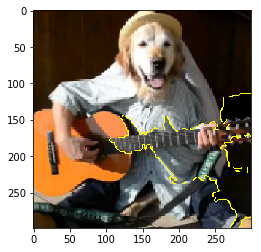

In [13]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

The chosen region mostly agrees with the label electric guitar.

In [14]:
## Let us look at another interesting prediction that says golden retriver,

decode_predictions(preds)[0][3]

('n02099601', 'golden_retriever', 0.009939371)

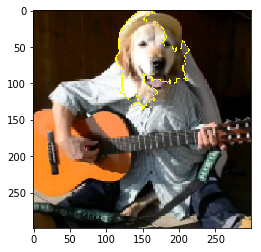

In [15]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[3], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

The region picked by the model exactly coincides with the dog face. Thus we can verify that our model is making decisions through appropriate region and hence place more confidence on this model. We have just illustrated how we can explain the predictions of a model using LIME.

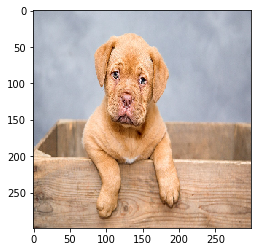

In [16]:
## Exercise
'''
1. Load the image dog.jpg and make predictions using inception model .
2. Make a plot of the input image and observe the data being sent in.
3. Plot the superpixels that contribute positively to the top prediction.
4. Plot the whole image with the superpixels providing positive contribution marked by its boundaries.
5. Plot the top 10 superpixels that have high influence irrespective of whether its positive or negative.

'''

## Solution:

# Load the image
images = transform_img_fn(['../images/dog.jpg'])
# Divide the image by  2 and add 0.5 to offset the preprocessing done by inception model.
plt.imshow(images[0] / 2 + 0.5)

In [17]:

## Make predictions.
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

('n02100583', 'vizsla', 0.6334918)
('n02099849', 'Chesapeake_Bay_retriever', 0.08345903)
('n02108422', 'bull_mastiff', 0.07353018)
('n02087394', 'Rhodesian_ridgeback', 0.013773163)
('n02099712', 'Labrador_retriever', 0.00998629)


In [18]:
## Create LIME explainer and generate explanation.

explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(images[0], inet_model.predict, 
                                         top_labels=5, hide_color=0, num_samples=1000)

In [19]:
images[0].shape

(299, 299, 3)

In [20]:
explanation.top_labels[0]

211

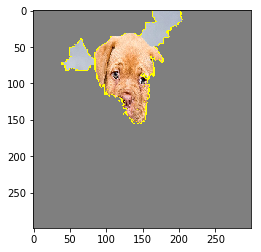

In [21]:

## Seek explanation for the top prediction 
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask)) 

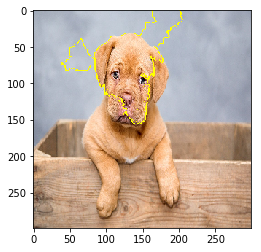

In [22]:

##Plot the entire image along with top  positive contribution 
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, 
                                            num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

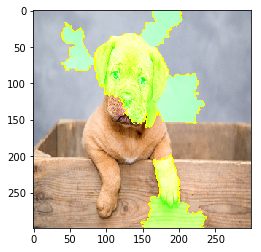

In [23]:


##Plot the entire image along with top 10 positive as well as negative contribution
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, 
                                            num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

## 4.3  Pixelwise explanation:

Deep learning is a set of neural networks stacked together, where each layer computes an alternate representation of it's input. While the first layer feature is directly computed on the image, we know that the successive layers operate on the features from previous layers rather than input.  While a 3 * 3 filter in the first layer represents feature for a 3 * 3 region, the 3 * 3 filter from the second layer  computes features for a much larger region in the image. The size of the region that impacts a given neuron/filter's activation is called as receptive field.


This along with the fact that at each layer there is a non-linear transformation  is what provides more capability to deep networks. But these two factors make it difficult to intepret the decision made by the network since we no longer could relate the final layer features to the input directly.

<img src= '../images/classification.jpeg'>

Above image illustrates the process where an input converted to features in successive layers and the final layer can be considered as an alternate low-dimensional representation of the image. Classifier takes it as input and produces a score.

The output $x_j$ of a neuron $j$ is a non-linear activation function $g$ as given by
\begin{align}
x_j &=  g\Big(  {\textstyle \sum_i} w_{ij} x_i    +b \Big) 	\label{eq:neuron}
\end{align}

While the initial layers can be directly mapped to the features , it isn't possible to map the final layer features to the input. In this module we are interested in methods that can help us distribute the score given by the neural network to features in each layer and decompose it strategically to layers beneath it , till we reach the input. The image below illustrates the process  where the final layer score is passed successively till it reaches the input layer, such that each pixel is weighted by the contribution it makes to the final score.

<img src= '../images/Pixelwise_score.png'><br>

Our objective in this section is to decompose the score assigned by classifier in $f(x)$ to sum of relevance scores for each pixel $R(x_i)$ , where a positive  score indicates that the feature supports the classification and a negative score  indicates that the pixel provides evidence against the classification.<br><br>
$$
f(x) = \sum  R(x_i) 
$$ 





## 4.3.1 Layerwise Relevance Propagation:


We are aware that our goal is to find the influence of every pixel in the input on final output.The final ouput is indeed computed by forward propagation , where each layer's output is passed on to subequent layer. The output of a neuron at every layer is computed as weighted sum of features from previous layer followed by an activation function. This is repeated all the way till the final layer.

The output $x_j$ of a neuron $j$ is a non-linear activation function $g$ as given by

\begin{align}
x_j =  g\Big(  {\textstyle \sum_i} w_{ij} x_i    +b \Big) 	\label{eq:neuron}
\end{align}

where $w_{ij}$ and $b$ are the parameters that are learned during training.




<img src= '../images/LRP1.png'>

Given an image $x$ and a classifier output $f(x)$ the aim of layer-wise relevance propagation is to assign each pixel $p$ of $x$ a pixel-wise relevance score $R^{(1)}_p$ such that 
\begin{align}
f(x) \approx {\textstyle \sum_p} R^{(1)}_p 
\end{align}

The relevance of the final layer $R_p^{(l)}$ is equal to the output of the network $f(x)$. In relevance propagation we start from the  final layer and distribute this relevance value to the units in the previous layer. We repeat this until we reach the input layer (image), upon which we will have the relevance value for every pixel in the image.At any moment, relevance of a neuron at layer $(l+1)$ is distributed to all the units in the preceding layer(l) that serve as input during forward propagation.We continue to do this,starting from final layer till we reach the input layer. Overall what we have accomplished is attributing the output score to individual pixels according to their influence in forward propagation. By doing so we have explained the output in terms of input, just like how it can be done explicity in a model like linear regression.

## 4.3.2 Relevance as Message Passing

Relavance is communicated to the preceding layers as messages.Assume that we know the relevance $R^{(l+1)}_j$ of a neuron $j$ at network layer $l+1$ for the classification decision $f(x)$, then we like to decompose this relevance into messages $R^{(l,l+1)}_{i \leftarrow j}$ sent to those neurons $i$ at the layer $l$ which provide inputs to neuron $j$ . <br> <br>
\begin{align}
  R^{(l+1)}_j=\sum_{i \in (l)} R^{(l,l+1)}_{i \leftarrow j} \label{eq:lrc0}
\end{align}

Relevance of a neuron at layer $l$ is computed by absorbing all the incoming messages it receives from subsqeuent layer $l+1$.We  define the relevance of a neuron $i$ at layer $l$ by summing all messages from neurons at layer $l+1$ <br><br>
\begin{align}
  R^{(l)}_i=\sum_{j \in (l+1)} R^{(l,l+1)}_{i \leftarrow j} 
\end{align}

<br>

The relevance of the output neuron at layer $M$ is $R^{(M)}_1=f(x)$. The pixel-wise scores are the resulting relevances of the input neurons $R^{(1)}_d$. 

 The messages $R^{(l,l+1)}_{i \leftarrow j}$ are computed as
 
\begin{align}
R^{(l,l+1)}_{i \leftarrow j} & = \frac{ z_{ij} }{ z_j + \epsilon \cdot \mathrm{sign}(z_j) }R^{(l+1)}_j 
\end{align}


with $z_{ij} = (w_{ij} x_i )$ and $z_j = \sum_{k: w_{kj} \neq 0 } z_{kj}$. x_i are the output from previous layers weighted by the network paramter $w_{ij}$.

The variable $\epsilon$  is to avoid division by zero errors when $z_j$ is close to zero, and which is chosen to be small.



The relevance of the output neuron at layer $M$ is $R^{(M)}_1=f(x)$. The pixel-wise scores are the resulting relevances of the input neurons $R^{(1)}_d$. 

In [24]:
## Reference 

## Import keras,numpy , innvestigate
## pip install innvestigate

%matplotlib inline  

import imp
import numpy as np
import os
from matplotlib import pyplot as plot

import PIL
import keras
import keras.backend
import keras.models



import innvestigate
import innvestigate.applications.imagenet
import innvestigate.utils as iutils

# Load helper functions from innvestigate module
eutils = imp.load_source("utils", "./utils.py")
imgnetutils = imp.load_source("utils_imagenet", "./utils_imagenet.py")



In [25]:
## Load VGG16 model from innvestigate

## Each application function returns a pretrained ImageNet model.


net = innvestigate.applications.imagenet.vgg16(load_weights=True, load_patterns="relu")

In [26]:
### The models are based on keras.applications models and contain additionally pretrained patterns
net.keys()

dict_keys(['name', 'image_shape', 'input_shape', 'model', 'in', 'sm_out', 'out', 'color_coding', 'preprocess_f', 'input_range', 'patterns'])

Above we could see the various attributes that innvestigate models expose about the model. Instead of the final output , if we are interested in the pre-softmax output we could use the key 'sm_out' to extract it.

In [27]:
# Handle input depending on model and backend.
channels_first = keras.backend.image_data_format() == "channels_first"
color_conversion = "BGRtoRGB" if net["color_coding"] == "BGR" else None

In [28]:
# Build the model using keras
# Input is same as the original model but instead of final output we fix the outputs to be before applying softmax
model = keras.models.Model(inputs=net["in"], outputs=net["sm_out"])
model.compile(optimizer="adam", loss="categorical_crossentropy")

W1110 16:44:46.072814 139640611338048 deprecation_wrapper.py:119] From /home/peerless/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [29]:
# we are building a keras model without the softmax at the output
model_wo_softmax = iutils.keras.graph.model_wo_softmax(model)

In [30]:
# Define a tuple that contains (method,attributes,outputformat,title strong)
method =("lrp.sequential_preset_a_flat",{"epsilon": 1},     imgnetutils.heatmap,       "LRP-PresetAFlat")




In [31]:
analyzer = innvestigate.create_analyzer(method[0],        # analysis method identifier
                                                    model_wo_softmax, # model without softmax output
                                                    **method[1] )## other parameters to be passed to analyser) 

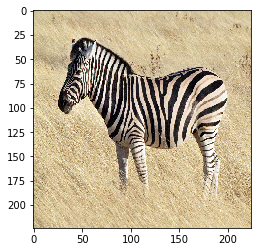

In [32]:


## Load the image that needs explanation

target_image = eutils.load_image("../images/zebra.jpg",224)

target_image_display = target_image/255.0 ## Normalising for display
plot.imshow(target_image_display)

In [33]:

x = target_image
x = x[None, :, :, :] ## add an additional dimension as required by the model.
x_pp = imgnetutils.preprocess(x, net) ## Prepreocess the image using model's preprocess routine
label_to_class_name = eutils.get_labelmapping() ## Gte the mapping from network prediction to actual label
# Predict final activations, probabilites, and label.
presm = model_wo_softmax.predict_on_batch(x_pp)[0] ## Model predicts presoftmax output
prob = model.predict_on_batch(x_pp)[0] ## final prediction after softmax
y_hat = prob.argmax()  ## the prediction with high probability.


print("%s" % label_to_class_name[y_hat] ,"%.2f" %prob.max())

zebra 1.00


The model has quite convincingly predicted that the given image is a zebra with probability 1.0. Now we invoke the analyser to find out the pixels that pushed the model to make predictions.

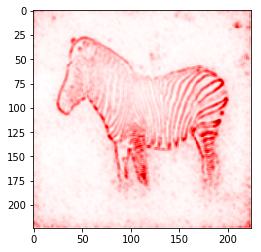

In [34]:
a = analyzer.analyze(x_pp) ## Invoke the analyser with preprocessed output, this does relevance propagation.
a = imgnetutils.postprocess(a, color_conversion, channels_first) ## Invert the preprocessing done by the model
a = imgnetutils.heatmap(a) ## Intepret the output as a heatmap.
plot.imshow(a[0])

The generated heatmap has high values for the strides and the boundary of zebra image. Thus the model has based its prediction largely on these regions , therefore this decision of the classier can be trusted.

In [35]:

## Exercise:
'''
Generate the relevance heat map using LRP or any other method supported by 
innvestigate library(https://github.com/albermax/innvestigate)
using vgg19 pretrained model.

1. Load vgg19 model.
2. Create a model whose output is without the softmax applied to final layer.
3. Create an analyser of a your chosen method.
4. Load 'dog.jpg' from images folder and make a prediction.
5. Generate relevance heatmap and report your observation about the result.

'''
## Import keras,numpy , innvestigate


%matplotlib inline  

import imp
import numpy as np
import os
from matplotlib import pyplot as plot

import PIL
import keras
import keras.backend
import keras.models



import innvestigate
import innvestigate.applications.imagenet
import innvestigate.utils as iutils

# Load helper functions from innvestigate module
eutils = imp.load_source("utils", "./utils.py")
imgnetutils = imp.load_source("utils_imagenet", "./utils_imagenet.py")

In [36]:
# Handle input depending on model and backend.
channels_first = keras.backend.image_data_format() == "channels_first"
color_conversion = "BGRtoRGB" if net["color_coding"] == "BGR" else None

In [37]:
## Load VGG16 model from innvestigate

## Each application function returns a pretrained ImageNet model.


net = innvestigate.applications.imagenet.vgg19(load_weights=True, load_patterns="relu")

In [38]:
# Build the model using keras
# Input is same as the original model but instead of final output we fix the outputs to be before applying softmax
model = keras.models.Model(inputs=net["in"], outputs=net["sm_out"])
model.compile(optimizer="adam", loss="categorical_crossentropy")
# we are building a keras model without the softmax at the output
model_wo_softmax = iutils.keras.graph.model_wo_softmax(model)

In [39]:
# Define a tuple that contains (method,attributes,outputformat)
method =("lrp.sequential_preset_a_flat",{"epsilon": 1},     imgnetutils.heatmap,       "LRP-PresetAFlat")
method_name = "lrp.sequential_preset_a_flat"
opt_params = {"epsilon":1}
postprocess_function = imgnetutils.heatmap
title = "LRP-PresetFlat"

In [40]:
analyzer = innvestigate.create_analyzer(method[0],        # analysis method identifier
                                                    model_wo_softmax, # model without softmax output
                                                    **method[1]) 

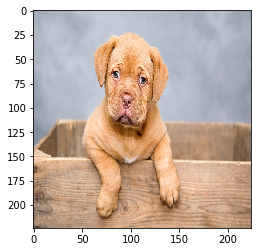

In [41]:


kite_image = eutils.load_image("../images/dog.jpg",224)
kite_image_display = kite_image/255.0
plot.imshow(kite_image_display)

In [42]:
text=[]
x = kite_image
x = x[None, :, :, :]
x_pp = imgnetutils.preprocess(x, net)
label_to_class_name = eutils.get_labelmapping()
# Predict final activations, probabilites, and label.
presm = model_wo_softmax.predict_on_batch(x_pp)[0]
prob = model.predict_on_batch(x_pp)[0]
y_hat = prob.argmax()


print("%s" % label_to_class_name[y_hat] ,"%.2f" %prob.max())

vizsla 0.80


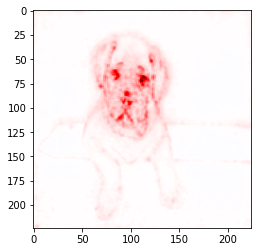

In [43]:
a = analyzer.analyze(x_pp)
a = imgnetutils.postprocess(a, color_conversion, channels_first)
a = imgnetutils.heatmap(a)
plot.imshow(a[0])

We could see the heatmap has high values near the face of the dog and the boundaries of the body. It also does place some minimal significance on the wooden plank. But the face region has quite high relevance and hence this decision of the classifier can be trusted.

## Conclusion

In this module we have looked at two methods illustrating two different techniques to analyse deep neural networks output. LIME - the first method was based on the sensitivity of the learned model to perturbations in input. It explores the region around input to answer the question what changes in input can be done so that the prediction becomes not a dog and what other changes can make the network predict more confidently as dog. LRP- the second method decomposes the model prediction and projects on to the input,thereby explaining which regions in the image have contributed for the result. These family of methods based on decomposition explains what makes a dog a dog. Intepretability in deep learning is a fast growing research field and to keep up with latest developments, you could follow workshops and papers in this area in major conferences example: CVPR19 [Intepretability workshop](https://interpretablevision.github.io/)

References:
    
    1."Why should I trust you?" - Explaining the predictions of any classifier.  - Riberio Et.Al
                            (https://arxiv.org/pdf/1602.04938.pdf)

## Quiz






1. **Why is it harder to intepret a deep learning model?**<br>
    1 . It was trained on a large dataset.<br>
    2 . The final layer contains exponential functions which results in high values difficult to intepret.<br>
    3 . Each layer contains non-linearity and a deep network has many layers which increases its complexity.<br>
    4 . The input is preprocessed and hence loses its ability to be intepreted.<br>
    
Answer:
3

Explanation:

The non-linearties in each layer transforms their input that becomes complex. Hence its not possible to reason based on those features. Also to be noted is deeper we go in a  neural network the receptive field increases.



2. **Which among the statements below is not true?**

    1. Relevance of the final layer is equal to the output of the network.
    2. Relevances are computed by a process called backpropagation.
    3. The sum of relevances in each layer will be the same for every layer in the network.
    4. There can be pixels with negative relevance.
    
Answer:2

Explanation:

Relavances are computed by relevance propagation.



3 . LIME can be used with any classifier.

1 . True <br>
2 . False <br>

Answer : True, LIME is classifier agnostic and can be used with any classifer.